In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
sat = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\satellite-unsupervised-ad.csv',header = None)

In [3]:
sat

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,46.0,40.0,119.0,139.0,42.0,30.0,135.0,157.0,42.0,30.0,...,113.0,50.0,46.0,111.0,116.0,44.0,31.0,131.0,142.0,o
1,47.0,37.0,119.0,133.0,44.0,34.0,124.0,143.0,44.0,34.0,...,85.0,50.0,39.0,118.0,132.0,43.0,29.0,133.0,143.0,o
2,80.0,95.0,100.0,74.0,64.0,64.0,104.0,96.0,46.0,36.0,...,81.0,82.0,91.0,92.0,78.0,78.0,83.0,96.0,74.0,o
3,56.0,51.0,72.0,60.0,59.0,54.0,72.0,60.0,59.0,51.0,...,50.0,57.0,55.0,74.0,61.0,57.0,55.0,78.0,65.0,o
4,44.0,34.0,129.0,140.0,44.0,34.0,124.0,136.0,44.0,34.0,...,139.0,43.0,31.0,128.0,135.0,43.0,29.0,128.0,132.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,60.0,83.0,100.0,81.0,60.0,83.0,96.0,85.0,64.0,87.0,...,85.0,66.0,91.0,104.0,92.0,66.0,87.0,108.0,89.0,n
5096,64.0,83.0,104.0,88.0,64.0,79.0,100.0,85.0,56.0,71.0,...,85.0,63.0,83.0,100.0,85.0,66.0,83.0,100.0,85.0,n
5097,68.0,75.0,108.0,96.0,71.0,87.0,108.0,88.0,71.0,91.0,...,89.0,63.0,87.0,104.0,89.0,70.0,100.0,104.0,85.0,n
5098,71.0,87.0,108.0,88.0,71.0,91.0,100.0,81.0,76.0,95.0,...,89.0,70.0,100.0,104.0,85.0,70.0,91.0,104.0,85.0,n


In [4]:
shuffled_df = sat.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,36
0,0
1,0
2,0
3,0
4,0
...,...
5095,0
5096,0
5097,0
5098,0


In [6]:
accuracies = []
auc_scores = []
for i in range(10):
  iforest = IForest()
  iforest.fit(df)
  iforest_pred = iforest.labels_
  iforest_scores = iforest.decision_scores_
  
  iforest_accuracy = accuracy_score(y,iforest_pred)
  roc_auc = roc_auc_score(y, iforest_scores)

  accuracies.append(iforest_accuracy)
  auc_scores.append(roc_auc)

avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
  
print(avg_accuracy)
print(avg_auc)

0.9100784313725491
0.9499990713101161


In [6]:
iforest = IForest()
iforest.fit(df)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [7]:
iforest_pred = iforest.labels_
iforest_accuracy = accuracy_score(y,iforest_pred)
print(iforest_accuracy)

0.9092156862745098


In [8]:
iforest_scores = iforest.decision_scores_

F1-score: 0.21
0.9441273631840795


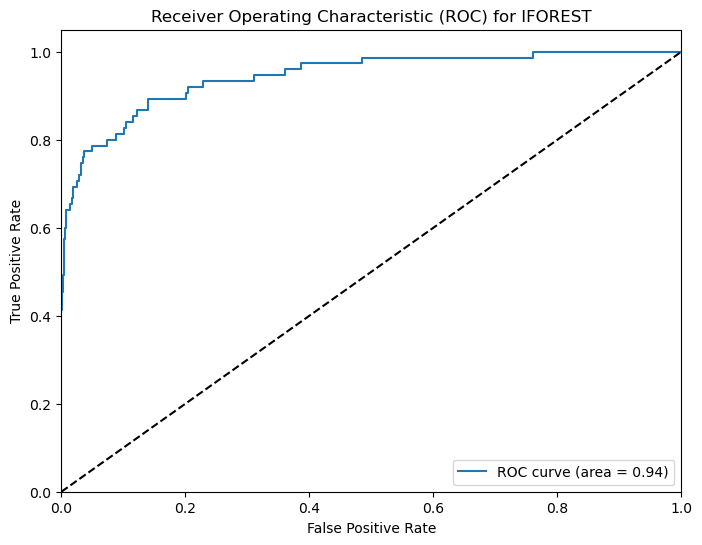

In [9]:
ifor_f1 = f1_score(y, iforest_pred)
print(f"F1-score: {ifor_f1:.2f}")

roc_auc = roc_auc_score(y, iforest_scores)
print(roc_auc)

ifor_fpr, ifor_tpr, _ = roc_curve(y, iforest_scores)

plt.figure(figsize=(8, 6))
plt.plot(ifor_fpr, ifor_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for IFOREST')
plt.legend(loc="lower right")
plt.show()